# Tarea 1   COM4001-1 Minería de Datos
## Profesor: Luis Cossio.
## Ayudante: Gabriel Díaz.
--- 

- Nombre: Felipe Scanda Martínez
- Fecha de Entrega: 26 de abril de 2025

## Objetivos
- Repaso Programación funcional en Python.
- Uso de colaboratory y entrega de informes basados en esta herramienta.
- Introducción a las librerías Numpy, Pandas y Matplotlib.
- Introducción al manejo de datos, visualización y cálculo de estadisticas básicas.
- Correlación e inferencia de resultados.

## Instrucciones
- La tarea a realizar se debe presentar de forma individual, cualquier copia o plagio será sancionada con nota 1.0 a todos los involucrados y con posible sumario.
- La tarea consiste en resolver las preguntas relacionadas a la base de datos a estudiar,
aplicando los conceptos de programación aprendidos en Catedras y Ayudantías. Las
soluciones en código y las interpretaciones de resultados deben ir en el mismo notebook
donde se va creando el informe y serán evaluadas.
- La tarea debe contener una sección de discusión y conclusiones de los resultados obtenidos, sientase libre de explayarse profundamente en este punto.
- Se debe agregar una sección de referencias al final de la tarea, agregando la documentación con la que se trabajó. En caso de no agregar referencias lógicas (que sean reales) la nota máxima se reducirá a 4.0 se solicita un mínimo de 3 referencias utilizadas, contando cualquier link, libro o material adecuado para realizar la evaluación.

In [56]:
#Importar librerias 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, pearsonr

## Descripción de las columnas de la base de datos  

- **REF_DATE**: Año de referencia de los datos (por ejemplo, 2010–2021).  
- **GEO**: Etiqueta de la provincia o región geográfica (por ejemplo, "Provincia 1").  
- **Statistic**: Tipo de métrica utilizada (por ejemplo, gasto promedio del hogar).  
- **Before-tax household income quintile**: Clasificación de los hogares según nivel de ingreso antes de impuestos (por ejemplo, más bajo, segundo, etc.).  
- **Household expenditures, summary-level categories**: Categoría de gasto del hogar (por ejemplo, alimentación, vivienda).  
- **UOM**: Unidad de medida utilizada (generalmente en dólares).  
- **COORDINATE**: Identificador único codificado para cada registro (por ejemplo, "C1").  
- **Expense**: Valor reportado del gasto del hogar.  
- **Family type**: Tipo de estructura familiar (por ejemplo, pareja con hijos, familia monoparental).  
- **Age of older adult**: Grupo etario del adulto mayor en el hogar.  
- **Family income**: Ingresos familiares
- **Income**: Ingresos

In [57]:
df= pd.read_csv("Income_expense_data.csv")
df

,REF_DATE,GEO,Statistic,Before-tax household income quintile,"Household expenditures, summary-level categories",UOM,COORDINATE,Expense,Family type,Age of older adult,Family income,Income
0,2010,Province 1,Average expenditure per household,All quintiles,Total expenditure,Dollars,C1,72075.0,Couple families,Total all ages,All income groups,7989380.0
1,2010,Province 1,Average expenditure per household,All quintiles,Food purchased from stores,Dollars,C2,5709.0,Couple families,Total all ages,"Under $10,000",189700.0
2,2010,Province 1,Average expenditure per household,All quintiles,Food purchased from restaurants,Dollars,C3,2141.0,Couple families,Total all ages,"$10,000 and over",7799670.0
3,2010,Province 1,Average expenditure per household,All quintiles,Shelter,Dollars,C4,15020.0,Couple families,Total all ages,"$15,000 and over",7695970.0
4,2010,Province 1,Average expenditure per household,All quintiles,Principal accommodation,Dollars,C5,13586.0,Couple families,Total all ages,"$20,000 and over",7552050.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13255,2021,Province 13,Average expenditure per household,Highest quintile,Household furnishings,Dollars,C1322,2433.0,Couple families,55 to 64 years,"$70,000 and over",6160.0
13256,2021,Province 13,Average expenditure per household,Highest quintile,Household equipment,Dollars,C1323,2759.0,Couple families,55 to 64 years,"$75,000 and over",5940.0
13257,2021,Province 13,Average expenditure per household,Highest quintile,Household appliances,Dollars,C1324,1236.0,Couple families,55 to 64 years,"$80,000 and over",5650.0
13258,2021,Province 13,Average expenditure per household,Highest quintile,Clothing and accessories,Dollars,C1325,3941.0,Couple families,55 to 64 years,"$90,000 and over",5040.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   REF_DATE                                          13260 non-null  int64  
 1   GEO                                               13260 non-null  object 
 2   Statistic                                         13260 non-null  object 
 3   Before-tax household income quintile              13260 non-null  object 
 4   Household expenditures, summary-level categories  13260 non-null  object 
 5   UOM                                               13260 non-null  object 
 6   COORDINATE                                        13260 non-null  object 
 7   Expense                                           13024 non-null  float64
 8   Family type                                       13260 non-null  object 
 9   Age of older adul

## **Parte 1: Cargar datos y análisis preliminar**  

A continuación debe calcular estadísticas básicas de los datos. Para el conjunto, calcule y responda:

- Determine la cantidad de instancias (número de muestras).
- Cuantos y cuáles son los atributos (columnas) de los set de datos, además muestre el tipo de dato asociado a cada variable.
- Implemente funciones propias para calcular el promedio, la mediana, el mínimo, el máximo y la desviación estandar de cada uno de los atributos que se lo permita, luego utilice las funciones por defecto de numpy o pandas y compare los resultados obtenidos, mencione cualquier observacion relevante.
- Investigue, explique y presente la matriz de correlación entre los atributos del dataset.

### Responda las siguientes preguntas

1. ¿Cuántos registros y cuántas columnas tiene la base de datos? ¿Qué tipos de datos contiene cada columna?  
2. ¿Existen valores nulos en la base de datos? Si es así, ¿en qué columnas y cuántos hay? ¿Cómo podrias tratar esos datos? (Responder de manera teórica, es decir, Busque 3 métodos para inserción de datos faltantes que usted crea pertinentes)
3. ¿Cuántas categorías únicas hay en la columna "Household expenditures, summary-level categories"? ¿Cuáles son las más frecuentes?

In [59]:
#Cantidad de instacias

print("Cantidad de instancias: ", len(df))

#Atributos y sus tipos

print(df.info())

#Funciones

def promedio(df):
    numeros = df.select_dtypes(include=['int', 'float'])
    for columna in numeros:
        noNull = numeros[columna].dropna()
        promedio = noNull.sum()/len(noNull)

        print(columna, promedio)


def mediana(df):
    numeros = df.select_dtypes(include=['int', 'float'])
    
    for columna in numeros:
        ordenados = numeros[columna].dropna().sort_values()
        
        if len(ordenados)%2 == 0:
            medi = (ordenados.iloc[(len(ordenados)//2)-1] + ordenados.iloc[(len(ordenados)//2)])/2

        else:
            medi = ordenados.iloc[(len(ordenados)//2)-1]

        print(columna, medi)
    
def minimo(df):
    numeros = df.select_dtypes(include=['int', 'float'])
    
    for columna in numeros:
        ordenados = numeros[columna].dropna().sort_values()

        mini = ordenados.iloc[0]

        print(columna, mini)

def maximo(df):
    numeros = df.select_dtypes(include=['int', 'float'])
    
    for columna in numeros:
        ordenados = numeros[columna].dropna().sort_values()

        maxi = ordenados.iloc[len(ordenados)-1]

        print(columna, maxi)

def desviacion(df):
    numeros = df.select_dtypes(include=['int', 'float'])
    
    for columna in numeros:
        noNull = numeros[columna].dropna()
        sumatoria = 0
        prom = noNull.mean()
        largo = len(noNull)

        for i in range(0, largo-1):
            sumatoria += (noNull.iloc[i] - prom)**2

        sigma = (sumatoria/largo)**(1/2)

        print(columna, sigma)

print("-----------------------------------------------------------")

print("Promedios de los datos: ")
promedio(df)

print("\nMediana de los datos: ")
mediana(df)

print("\nMinimos de los datos: ")
minimo(df)

print("\nMáximos de los datos: ")
maximo(df)

print("\nDesviación estándar de los datos: ")
desviacion(df)

df.describe()

Cantidad de instancias:  13260
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   REF_DATE                                          13260 non-null  int64  
 1   GEO                                               13260 non-null  object 
 2   Statistic                                         13260 non-null  object 
 3   Before-tax household income quintile              13260 non-null  object 
 4   Household expenditures, summary-level categories  13260 non-null  object 
 5   UOM                                               13260 non-null  object 
 6   COORDINATE                                        13260 non-null  object 
 7   Expense                                           13024 non-null  float64
 8   Family type                                       13260 non-null 

,REF_DATE,Expense,Income
count,13260.000000,13024.000000,1.325400e+04
mean,2014.800000,9628.216063,1.900229e+05
std,3.340785,21039.898472,7.889770e+05
min,2010.000000,65.000000,2.000000e+01
25%,2012.000000,1552.000000,4.740000e+03
50%,2014.500000,3195.500000,1.547000e+04
75%,2017.000000,8434.500000,4.330000e+04
max,2021.000000,221396.000000,8.980830e+06


Luego de usar las funciones creadas y la funcion ".describe()" de la libreria pandas en el dataframe, notamos que todos los datos coinciden exactamente los unos con los otros, por lo que podemos concluir que la funcion de pandas solo se aplica a las columnas que sean de tipo numérico, ya sea entero o flotante, además de aplicarse a cada columna individualmente, tal cual como lo hacen las funciones implementadas, ya que si no lo hiciera así, los resultados serian distintos. Para ejemplificar lo mencionado anteriormente, veamos que la cantidad de datos no-nulos de la columna 'REF_DATE' es de 13260, mientras que en la columna 'Expense' son de 13024, y si la funcion ".describe()" se aplicara para todas las columnas en conjunto, en la columna 'REF_DATE' se eliminarian todas las filas asociadas a los datos nulos en la columna 'Expense', cambiando asi el resultado de los datos solicitados (promedio, desviacion estandar, etc.).


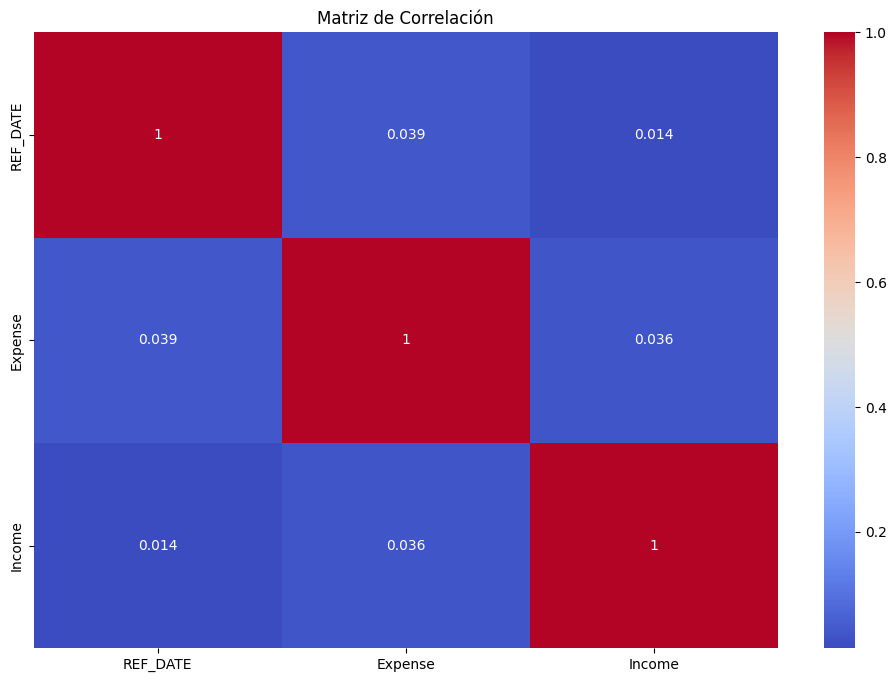

In [60]:
#Matriz de correlacion

numeros = df.select_dtypes(include=[np.number])
matriz_correlacion = numeros.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


En esta matriz de correlación de Pearson podemos observar que entre ninguna de las variables se ve una correlación alta. Por ejemplo, entre "REF_DATE" e "Income" hay un valor de correlación de 0.014, lo cual es bastante bajo e indica que entre las variables no hay mucha correlación. En los demas casos se aprecia algo similar, siendo el máximo de correlacion el valor de 0.039 entre "REF_DATE" y "Expense" , el cual sigue siendo un valor muy bajo y no indica una relación de correlación. De esto, concluimos que entre los datos presentados en la matriz no existe una relación y por lo tanto, la variación de una de estas variables no afecta a las demás.

## Preguntas

1. ¿Cuántos registros y cuántas columnas tiene la base de datos? ¿Qué tipos de datos contiene cada columna? 

La base de datos consta de un total de 13.260 registros y 12 columnas, donde los tipos de datos de las columnas son:

- REF_DATE: Entero (int)
- GEO: String (object)
- Statistic: String (object)
- Before-tax household income quintile: String (object)
- Household expenditures, summary-level categories: String (object)
- UOM: String (object)
- COORDINATE: String (object)
- Expense: Número Flotante (float)
- Family type: String (object)
- Age of older adult:  String (object)
- Family income: String (object)
- Income: Número Flotante (float)

2. ¿Existen valores nulos en la base de datos? Si es así, ¿en qué columnas y cuántos hay? ¿Cómo podrias tratar esos datos? (Responder de manera teórica, es decir, Busque 3 métodos para inserción de datos faltantes que usted crea pertinentes)

Si existen valores nulos en la base de datos, como lo pueden ser las columnas de "Expense", que cuenta con 236 valores nulos, y la columna "Income", con tan solo 6 valores nulos. Para tratar estos datos existen varias formas, de las cuales usaría las 3 siguientes:

- Rellenar los datos faltantes con el valor 0, util en casos en los cuales dichos datos sean pocos y su aporte no es significativo para el análisis, como lo sería en el caso de "Income", con 6 valores nulos.

- Rellenar los datos faltantes con el valor del promedio, aplicable en los casos en los que la cantidad de valores nulos es mayor y se necesitan de esos datos para el análisis. Por tanto, si se reemplazan los valores nulos con el promedio, no se estaría afectando el valor de este último. Esta opcion sería aplicable para el caso de "Expense".

- Rellenar los datos faltantes con una interpolación de los datos adyacentes, lo cual es util en casos donde los datos de las filas están relacionados entre sí o sigan un patron. Por lo tanto, si ordenamos todos los datos de menor a mayor e interpolamos los datos de los valores nulos, obtendríamos el valor medio de los datos adyacentes, lo cual nos daría un dato que sigue el patron definido y se ajusta a él. Ejemplo: si tuvieramos la siguiente serie de datos; 2 4 6 8 - 12 14, donde "-" corresponde a un valor nulo, no es dificil notar que dichos datos siguen cierto patrón, y por lo tanto, interpolar el dato faltante sería la mejor opción.

3. ¿Cuántas categorías únicas hay en la columna "Household expenditures, summary-level categories"? ¿Cuáles son las más frecuentes?

In [61]:
#Categorias unicas
unicos = len(df["Household expenditures, summary-level categories"].unique())
print("La cantidad de categorias unicas son: \n", unicos)

#Conteo de cantidad de datos de cada categoria

print("\nLa cantidad de datos en cada categoria es: \n", df["Household expenditures, summary-level categories"].value_counts())

La cantidad de categorias unicas son: 
 17

La cantidad de datos en cada categoria es: 
 Household expenditures, summary-level categories
Total expenditure                                          780
Food purchased from stores                                 780
Food purchased from restaurants                            780
Shelter                                                    780
Principal accommodation                                    780
Rented living quarters                                     780
Owned living quarters                                      780
Water, fuel and electricity for principal accommodation    780
Other accommodation                                        780
Household operations                                       780
Communications                                             780
Household furnishings and equipment                        780
Household furnishings                                      780
Household equipment                        

Luego de utilizar las funciones de pandas, podemos ver que hay un total de 17 tipos de categotias distintas para "Household Expenditures", donde cada una de ellas tiene la misma cantidad de frecuencia, que es de 780.

## **Parte 2: Gráficos y visualización de datos**  

4. Representa mediante un **histograma** la distribución de los valores de la columna "Expense". ¿Cómo describirías su distribución? ¿Se parece a una distribución normal? 

- Luego de responder la pregunta 4, superponga una **distribución normal ajustada**, es decir, agregue Ajuste Gaussiano visto en ayudantía 2, sobre el histograma de "Expense". ¿Qué tan bien se ajusta la curva normal a los datos reales?  
5. Calcula el porcentaje de datos de "Expense" que se encuentran dentro de **una desviación estándar** de la media ($\mu \pm \sigma$). ¿Se acerca al 68% esperado en una distribución normal?

6. Realiza un **gráfico de barras** que muestre el gasto promedio por tipo de familia ("Family type"). ¿Qué observaciones puedes hacer?  
7. Usa un **gráfico de dispersión (scatter plot)** para analizar la relación entre "Income" y "Expense". ¿Qué tendencias puedes observar?  
8. **Gráfico de torta (pie chart):** ¿Cuál es la distribución GEO de la familia ("GEO") en la base de datos? ¿Como se dividen las familias en las provincias?  
9. **Gráfico de torta:** ¿Cómo se distribuyen los quintiles de ingreso antes de impuestos ("Before-tax household income quintile")? ¿Hay algún grupo predominante?  
10. **Comparación de gráficos:** Compara la distribución de gastos por categoría usando un **gráfico de barras** y un **gráfico de torta**. ¿Qué diferencias notas entre ambos enfoques visuales?

## Preguntas 

4. Representa mediante un **histograma** la distribución de los valores de la columna "Expense". ¿Cómo describirías su distribución? ¿Se parece a una distribución normal? 

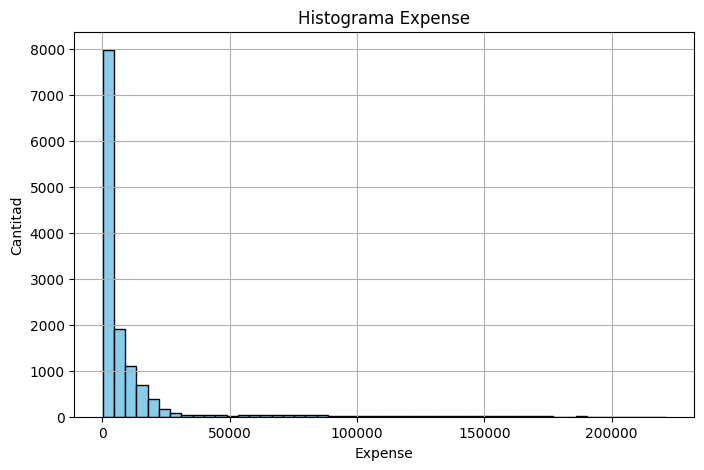

In [62]:
#Histograma de la distribución de "Expense"
plt.figure(figsize=(8, 5))
df['Expense'].plot(kind='hist', bins=50, edgecolor='black', color='skyblue')

plt.title('Histograma Expense')
plt.xlabel('Expense')
plt.ylabel('Cantitad')
plt.grid(True)
plt.show()

Luego de observar detenidamente el gráfico, notamos que la gran mayoría de los datos se encuentan en los valores más bajos de "Expense", para luego ir disminuyendo de manera drástica. A simple vista, no se podría decir que se parezca a una distribución normal, ya que tiene una forma asimétrica positiva, más bien, podemos asimilarlo a una distribución de tipo exponencial.

- Luego de responder la pregunta 4, superponga una **distribución normal ajustada**, es decir, agregue Ajuste Gaussiano visto en ayudantía 2, sobre el histograma de "Expense". ¿Qué tan bien se ajusta la curva normal a los datos reales?

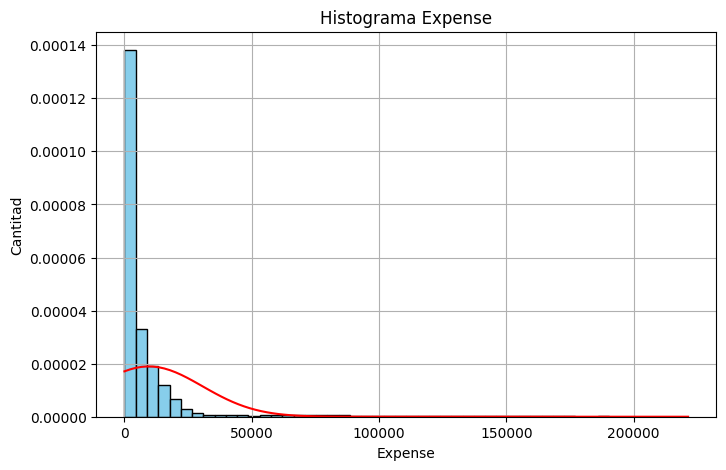

In [63]:
#Gráfico normalizado de la distribución de "Expense"
plt.figure(figsize=(8, 5))
df['Expense'].plot(kind='hist',density=True, bins=50, edgecolor='black', color='skyblue')

#Ajuste Gaussiano
mu, sigma = norm.fit(df['Expense'].dropna())
x = np.linspace(df['Expense'].min(), df['Expense'].max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="Ajuste Gaussiano")

plt.title('Histograma Expense')
plt.xlabel('Expense')
plt.ylabel('Cantitad')
plt.grid(True)
plt.show()

Luego de normalizar, podemos ver que la curva de distribución gaussiana no se ajusta del todo bien a los datos, por lo que se descarta que esta distribución sea una Normal.

5. Calcula el porcentaje de datos de "Expense" que se encuentran dentro de **una desviación estándar** de la media ($\mu \pm \sigma$). ¿Se acerca al 68% esperado en una distribución normal?

In [64]:
expense = df['Expense'].dropna()
expense_prom = expense.mean()
expense_desv = expense.std()

datos_una_desv = expense[(expense >= (expense_prom - expense_desv)) & (expense <= (expense_prom + expense_desv))]

porcentaje = (len(datos_una_desv)/len(expense))*100
print("Porcentaje de datos dentro de una desviación estándar:",porcentaje, "%")

Porcentaje de datos dentro de una desviación estándar: 94.31818181818183 %


El porcentaje obtenido se aleja demasiado del 68% de una distribución normal con una diferencia del 26%, por lo que podemos concluir que esta distrubución no corresponde a una estándar.

6. Realiza un **gráfico de barras** que muestre el gasto promedio por tipo de familia ("Family type"). ¿Qué observaciones puedes hacer?  

Family type
Couple families    9628.216063
Name: Expense, dtype: float64


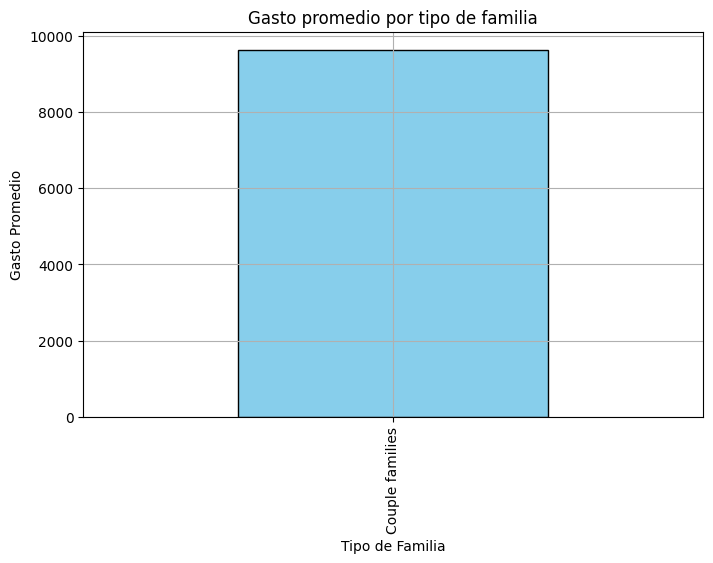

In [65]:
#Agrupacion de datos por tipo de familia
tipos_familia = df.groupby('Family type')
gasto_promedio = tipos_familia['Expense'].mean()
print(gasto_promedio)

#Gráfico de barras
plt.figure(figsize=(8,5))
gasto_promedio.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gasto promedio por tipo de familia')
plt.xlabel('Tipo de Familia')
plt.ylabel('Gasto Promedio')
plt.grid(True)
plt.show()

Luego de ver detenidamente el gráfico obtenido, podemos notar que solo hay un tipo de familia, "Couple families", y su gasto promedio es de aproximadamente 9.600. Con esta información no es posible realizar analisis ni comparaciones de qué tipo de familia es la que más gasta en promedio, o si el tipo de familia influye en los gastos, ya que solo tenemos la información de un tipo de familia. Entonces, se concluye que es necesaria una mayor diversidad en los datos para realizar los tipos de análisis antes mencionados.

7. Usa un **gráfico de dispersión (scatter plot)** para analizar la relación entre "Income" y "Expense". ¿Qué tendencias puedes observar?

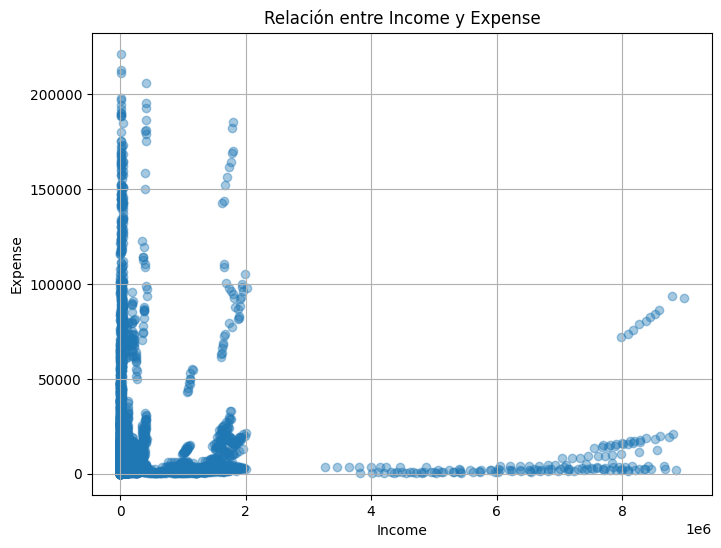

In [66]:
#Scatter plot entre "Income" y "Expense"
plt.figure(figsize=(8,6))
plt.scatter(df['Income'], df['Expense'], alpha=0.4)
plt.title('Relación entre Income y Expense')
plt.xlabel('Income')
plt.ylabel('Expense')
plt.grid(True)
plt.show()

En el gráfico se puede apreciar que la gran cantidad de datos está acumulada a la izquierda, donde la cantidad de ingresos es menor, por lo que podemos concluir que la gran mayoría de las familias cuentan con ingresos menores a 2.000.000. También, a la derecha se encuentran las familias con grandes niveles de ingresos, y a comparación de los demás, sus niveles de gastos no son tan elevados.

8. **Gráfico de torta (pie chart):** ¿Cuál es la distribución GEO de la familia ("GEO") en la base de datos? ¿Como se dividen las familias en las provincias?  

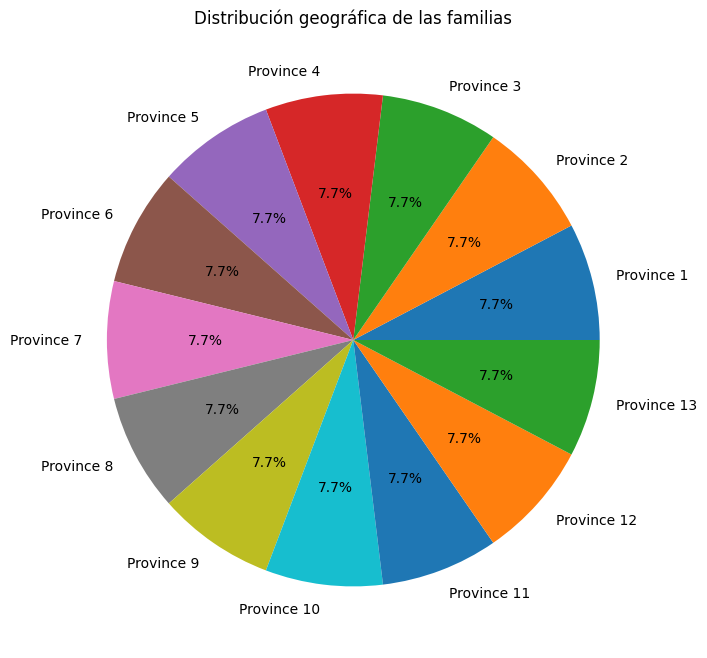

In [67]:
#Cantidad de familias por GEO
geo = df['GEO'].value_counts()

#Grafico de torta
plt.figure(figsize=(8, 8))
plt.pie(geo, labels=geo.index, autopct='%1.1f%%')
plt.title('Distribución geográfica de las familias')
plt.show()

Con el gráfico y sus porcentajes correspondientes, podemos notar que las familias se distribuyen en las 13 provincias de manera equitativa, con un 7.7% del total de registros en la base de datos.

9. **Gráfico de torta:** ¿Cómo se distribuyen los quintiles de ingreso antes de impuestos ("Before-tax household income quintile")? ¿Hay algún grupo predominante?  

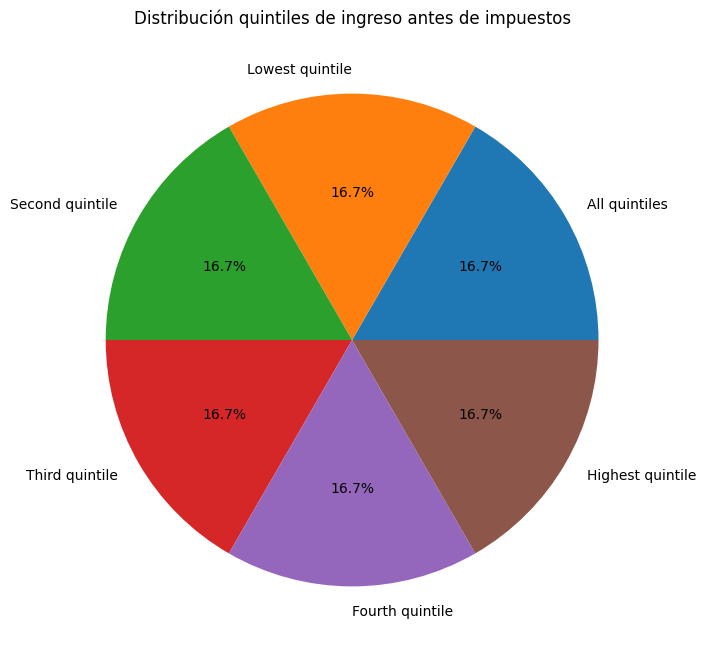

In [68]:
#Tipos de quintiles de ingreso antes de impuesto y sus cantidades
quintiles_ingreso = df['Before-tax household income quintile'].value_counts()

#Grafico de torta
plt.figure(figsize=(8, 8))
plt.pie(quintiles_ingreso, labels=quintiles_ingreso.index, autopct='%1.1f%%')
plt.title('Distribución quintiles de ingreso antes de impuestos')
plt.show()

Nuevamente, podemos apreciar una distribución uniforme en los quintiles de ingreso antes de impuestos, con un 16.7% cada uno, por lo que concluimos que no existe ningun grupo predominante en esta categoria.

10. **Comparación de gráficos:** Compara la distribución de gastos por categoría usando un **gráfico de barras** y un **gráfico de torta**. ¿Qué diferencias notas entre ambos enfoques visuales?

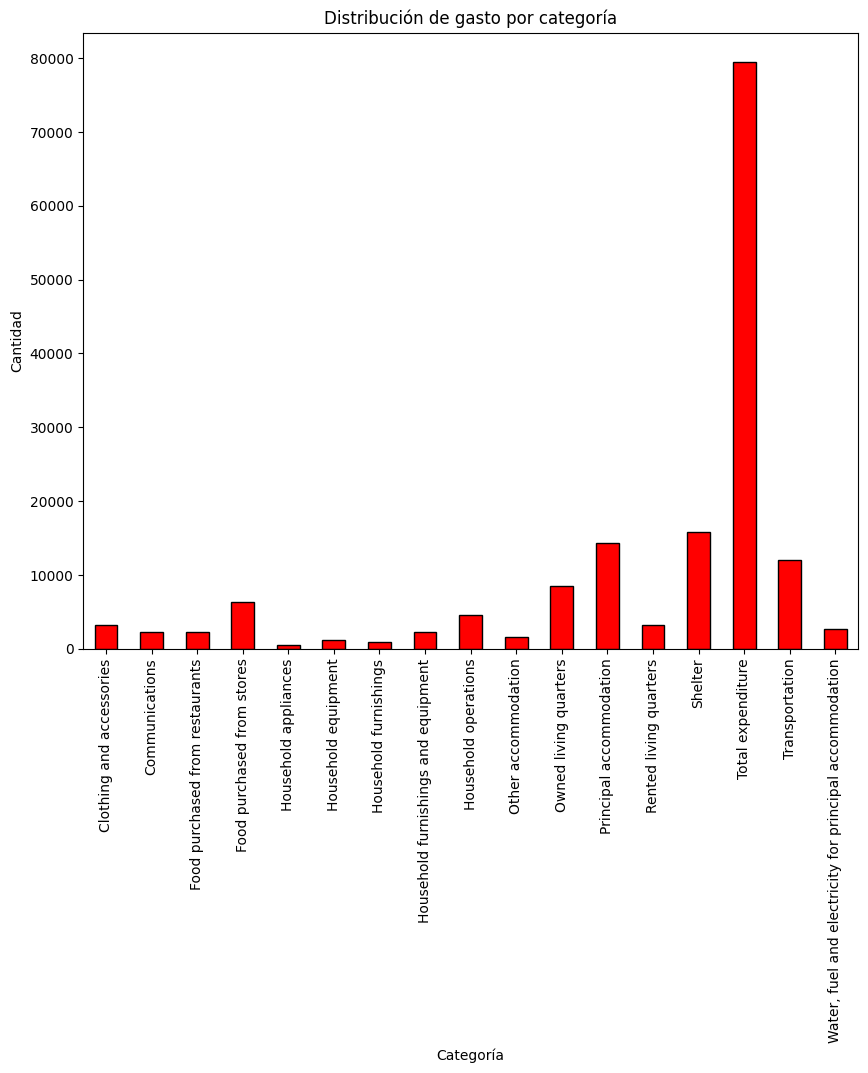

In [69]:
#Gastos por categoria
gastos_categoria = df.groupby('Household expenditures, summary-level categories')['Expense'].mean()

#Grafico de barras
plt.figure(figsize=(10, 8))
gastos_categoria.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Distribución de gasto por categoría')
plt.show()

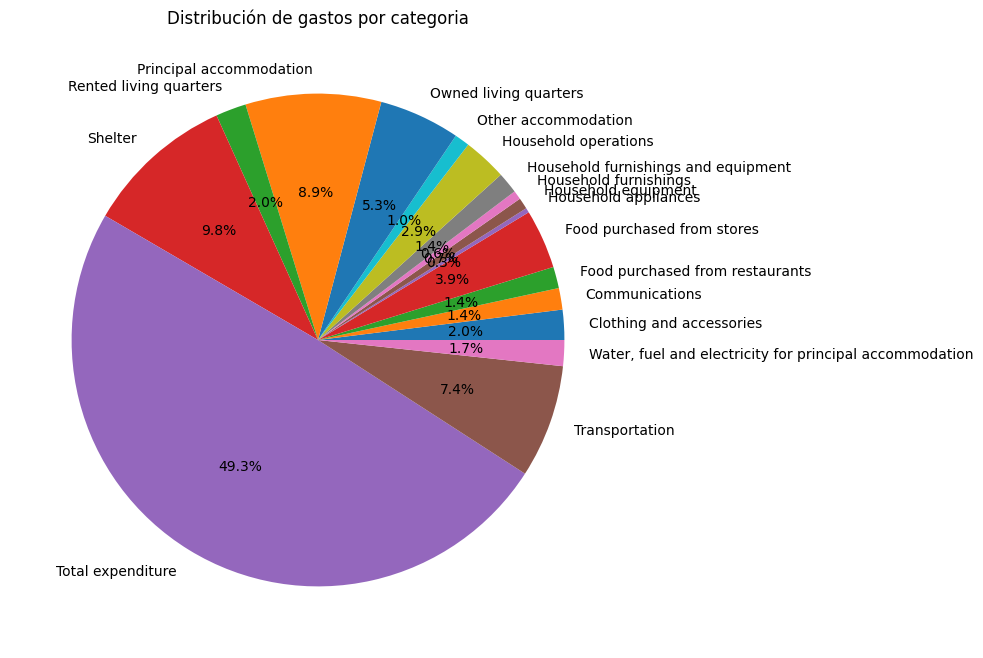

In [70]:
#Grafico de torta
plt.figure(figsize=(8, 8))
plt.pie(gastos_categoria, labels=gastos_categoria.index, autopct='%1.1f%%')
plt.title('Distribución de gastos por categoria')
plt.show()

Podemos vr que dependiendo del tipo de gráfico nos será más conveniente ver cierto tipo de información. Por ejemplo, en el gráfico de barras es más fácil poder ver la cantidad aproximada de cada categoría, mientras que el gráfico de torta es mejor para poder ver las proporciones entre las distintas categorías, así como el porcentaje que éstas representan en la base de datos.

In [71]:
#Para la siguiente parte (3) tiene permitido usar la libreria seaborn
from scipy.stats import pearsonr

## **Parte 3: Correlación**  

11. Calcula la **correlación de Pearson** entre "Income" y "Expense". ¿Existe una relación significativa entre estos valores? ¿Es positiva o negativa?  
12. ¿Cómo varía el gasto ("Expense") en función de los quintiles de ingreso antes de impuestos ("Before-tax household income quintile")? ¿Los hogares con más ingresos gastan proporcionalmente más?  
13. ¿Existe una diferencia significativa en los gastos según el grupo etario del adulto mayor en la familia ("Age of older adult")? ¿Los hogares con adultos mayores tienden a gastar más o menos?  


## Preguntas 

11. Calcula la **correlación de Pearson** entre "Income" y "Expense". ¿Existe una relación significativa entre estos valores? ¿Es positiva o negativa?  

In [72]:
#Correlacion de Pearson entre "Income" y "Expense"
correlacion, valor_p = pearsonr(df['Income'].fillna(df['Income'].mean()), df['Expense'].fillna(df['Expense'].mean()))
print("Valor de la correlación de Pearson: ", correlacion)

Valor de la correlación de Pearson:  0.03609688752112203


Con este resultado de 0.036 aproximadamente, nos damos cuenta de que no existe realmente una relación significativa entre estas dos categorías, puesto que este valor es bastante cercano a 0, lo que significa que no existe realmente correlación entre los valores.

12. ¿Cómo varía el gasto ("Expense") en función de los quintiles de ingreso antes de impuestos ("Before-tax household income quintile")? ¿Los hogares con más ingresos gastan proporcionalmente más?  

Valor de la correlación de Pearson:  0.13468664263627722


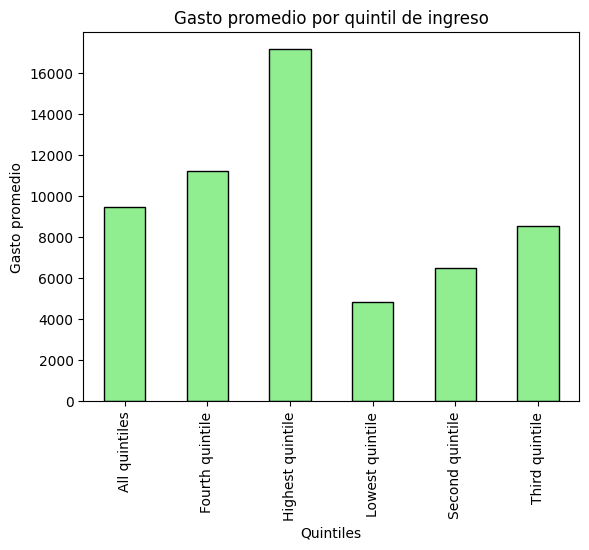

In [73]:
#Pasar quintiles de ingreso a valores numericos
quintiles_numericos = df['Before-tax household income quintile'].map({
    'All quintiles': 1,
    'Lowest quintile': 2,
    'Second quintile': 3,
    'Third quintile': 4,
    'Fourth quintile': 5,
    'Highest quintile': 6})

#Correlacion entre "Expense" y "Before-tax household income quintile"
correlacion, valor_p = pearsonr(quintiles_numericos, df['Expense'].fillna(df['Expense'].mean()))
print("Valor de la correlación de Pearson: ", correlacion)

#Agrupacion de "Expense" por quintiles en promedio
expense_quintiles = df.groupby('Before-tax household income quintile')['Expense'].mean()

#Grafico de barras
expense_quintiles.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Quintiles')
plt.ylabel('Gasto promedio')
plt.title('Gasto promedio por quintil de ingreso')
plt.show()

Si bien calculamos la correlación de Pearson entre ambas catgorías y dio un valor relativamente bajo, podemos ver también en el gráfico que efectivamente, los hogares pertenecientes a los más altos quintiles tienen en promedio un gasto mucho mayor que los que se encuentran en los quintiles más bajos.

13. ¿Existe una diferencia significativa en los gastos según el grupo etario del adulto mayor en la familia ("Age of older adult")? ¿Los hogares con adultos mayores tienden a gastar más o menos?  

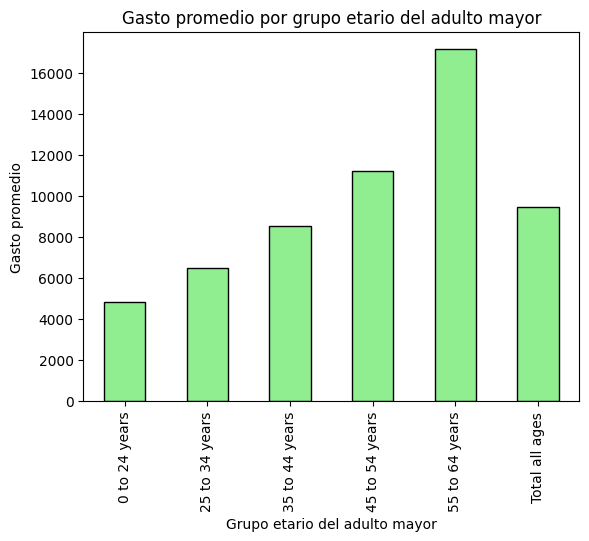

In [74]:
#Agrupacion de "Expense" por grupo etario del adulto mayor
expense_quintiles = df.groupby('Age of older adult')['Expense'].mean()

#Grafico de barras
expense_quintiles.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Grupo etario del adulto mayor')
plt.ylabel('Gasto promedio')
plt.title('Gasto promedio por grupo etario del adulto mayor')
plt.show()

Con el gráfico podemos ver que si existe una diferencia, bastante significativa, de los gastos promedio según el grupo etario del adulto mayor en la familia, puesto que a mayor sea este grupo etario, es decir, familias con adultos mayores en los hogares, tienden a gastar más en comparacion a las familias que no tienen adultos mayores.

## **Parte 4: Discusión y conclusiones del trabajo**  
14. Basado en el análisis de datos, ¿qué grupos de población parecen tener mayores gastos? ¿Por qué podría ser así?  
15. ¿Cuáles son los factores que parecen influir más en el gasto de los hogares? ¿Se puede identificar alguna tendencia o patrón relevante?  
16. Considerando los resultados obtenidos, ¿qué recomendaciones podrías hacer para mejorar la administración de los gastos del hogar? ¿Qué otros análisis podrían realizarse con esta base de datos? 

## Preguntas 

14. Basado en el análisis de datos, ¿qué grupos de población parecen tener mayores gastos? ¿Por qué podría ser así?  

Los grupos de población que tienen mayores gastos son tanto los mayores quintiles de ingresos como los hogares con grupo etario del adulto mayor más altos(segun los gráficos de las preguntas 12 y 13). Lo primero se podría deber a que a mayor ingresos tiene un hogar, mayor serán los gastos de la familia, ya sea porque se permiten más lujos o porque tienen un estilo de vida más caro. Por otra parte, los hogares con adultos mayores podrían tener más gastos debido a los cuidados que se le deben hacer a este grupo de personas en la familia, como la compra de suplementos alimenticios, remedios y gastos médicos, elevando así el costo de vida de la familia y por tanto, sus gastos.

15. ¿Cuáles son los factores que parecen influir más en el gasto de los hogares? ¿Se puede identificar alguna tendencia o patrón relevante?  

Los factores que influyen más en el gasto de los hogares corresponden a los relacionados con la vivienda y el transporte (según el gráfico de barras de la pregunta 10). En el apartado de vivienda, hay que diferenciar entre el pago de la vivienda propia y el pago del arriendo, donde la primera tiene un gasto promedio mucho mayor en comparación con la segunda. Esto se puede deber a que en general, el pago mensual de los arriendos suele ser mucho más bajo que el pago del total de una casa propia.

16. Considerando los resultados obtenidos, ¿qué recomendaciones podrías hacer para mejorar la administración de los gastos del hogar? ¿Qué otros análisis podrían realizarse con esta base de datos? 

Se podrían hacer recomendaciones dependiendo del nivel de ingresos, ya que como los sectores con ingresos más altos son más propensos a gastar más, la recomendación sería administrar mejor las cuentas, reducir los gastos innecesarios y ahorrar cierta parte de los ingresos, mientras que para los sectores con menos ingresos lo más recomendable sería diseñar un presupuesto que permita identificar todos los gastos y poder manejarlos de mejor manera.

Con esta base de datos se podrían hacer distintos tipos de análisis más, como el análisis de los outlayers o casos extremos en el caso de los ingresos "Income", predecir los gastos estimados dependiendo de los ingresos de cada familia, estudiar la proporción de gastos e ingresos de cada familia, entre otros. También cabe mencionar que si la base de datos fuese más variada y amplia, por ejemplo en los tipos de familia, daría paso a realizar muchos más análisis, como por ejemplo, clasificar o comparar los gastos según el tipo de familia, el gasto promedio de cada una, etc.

## **Referencias**: 

- Pandas: https://pandas.pydata.org/docs/
- MatPlotLib: https://pandas.pydata.org/docs/
- Seaborn: https://seaborn.pydata.org
- ChatGPT (para la revisión de errores en el código)